
<br><br>

<h4><center>
 SPACESHIP : Un hipotético accidente en el año 2900
</h4></center>


<h6><center>
    El objetivo de este ejercicio es predecir si un pasajero fue transportado a una dimensión alternativa durante un accidente espacio-temporal.<br>
    Para ayudarte a hacer esta predicción, puedes usar la información salvada del sistema informático dañado de la nave espacial.
</h6></center><br>


<h6><center>  Explicación de los datos en brutos : </h6></center><br>


<h6><center> 
        train.csv :  Datos de 2/3 de los pasajeros (~8700), para ser usado como dato de entrenamiento<br>

        PassengerId: ID del pasajero agrupada de la forma gggg_pp donde gggg indica el grupo de pasajeros al que pertenece, 
        siendo pp el número de pasajero dentro del grupo, personas dentro de un grupo puedes ser familias, pero no siempre se cumple esa condición.
              
        HomePlanet: El planeta de origen del pasajero, puede ser considerado planeta de residencia para aquellos que nacieron en otros planetas.
         
        CryoSleep: Indican aquellos pasajeros que han sido inducidos a sueño criogénico en cabinas especiales.
         
        Cabin: El número de la cabina en la que se encuentra el pasajero, tiene la forma deck/num/side, donde deck es el número de cabina, num el número de pasajero dentro de la cabina y side el lado de la cabina.
        P for Port ( Babor ) or S for Starboard ( Estribor ).

        Destination: Planeta donde el pasajero quiere ser transportado.

        Age: La edad del pasajero.
         
        VIP: Personas con un estatus especial dentro del viaje.
         
        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Cantidad de commodities que el pasajero ha comprado en el transcurso de su viaje.
         
        Name: Nombres y Apellidos de los pasajeros
         
        Transported: Columna que necesitamos predecir, marca a aquellos que fueron transportado a otra dimensión. 
         
<br>     
test.csv:  Datos del tercio restante de la tripulación (~2300), para ser usado como dato de prueba.
<br> 


sample_submission.csv : Envío de las simulaciones, tiene que ser dado de la siguiente forma:
     
 -PassengerId - Id for each passenger in the test set. 
 -Transported - The target. For each passenger, predict either True or False. 

        
</h6></center>

<center>Librerias necesarias :</center>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<center>Leemos los datos y los guardamos en una variable :</center>


In [14]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

<center>Empezamos mirando con head, los 5 primero elementos y sus columnas</center>


In [15]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [16]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<center>Vamos a trabajar con los datos nulos, lo primero es saber cuantos de estos datos están presente</center>


In [17]:
nulleds = [train.isnull().sum(), test.isnull().sum()]
nulleds = pd.DataFrame(nulleds).T
nulleds.columns = ['train', 'test']
nulleds

,train,test
PassengerId,0.0,0.0
HomePlanet,201.0,87.0
CryoSleep,217.0,93.0
Cabin,199.0,100.0
Destination,182.0,92.0
Age,179.0,91.0
VIP,203.0,93.0
RoomService,181.0,82.0
FoodCourt,183.0,106.0
ShoppingMall,208.0,98.0


<center> Mediante heatmap de Seaborn podemos graficar esos valores para hacernos una idea del panorama general</center>


<AxesSubplot:>

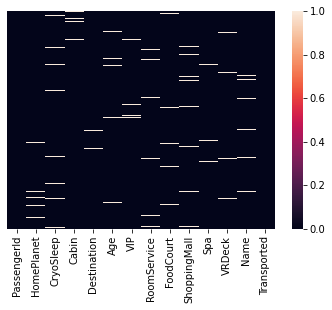

In [18]:
sns.heatmap(train.isnull(), yticklabels=False)

<AxesSubplot:>

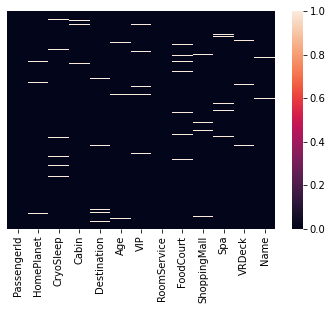

In [19]:
sns.heatmap(test.isnull(), yticklabels=False)

<center> Mediante una función vamos a reemplazar los valores nulos por la mediana o la moda.</center>


In [40]:

def repair_null(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

repair_null(train)
repair_null(test)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,True,2784,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,2912
1,1,0,False,1867,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,2406
2,2,1,True,257,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,3376
3,3,1,False,259,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2711
4,4,0,False,1940,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4272,0,True,2679,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,2105
4273,4273,0,False,2691,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,2654
4274,4274,2,True,602,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,2085
4275,4275,1,False,603,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,2327


<center> Ahora con los datasets limpios de valores nulos, vamos a proceder a obtener una info general, para ello vamos a usar fast_ml</center>


In [42]:
from fast_ml import eda

In [44]:
eda.df_info(test)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
PassengerId,int16,Numerical,4277,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
HomePlanet,int8,Numerical,3,"[0, 1, 2]",0,0.0
CryoSleep,bool,bool,2,"[True, False]",0,0.0
Cabin,int16,Numerical,3265,"[2784, 1867, 257, 259, 1940, 2098, 120, 463, 2...",0,0.0
Destination,int8,Numerical,3,"[2, 0, 1]",0,0.0
Age,float64,Numerical,80,"[27.0, 19.0, 31.0, 38.0, 20.0, 21.0, 23.0, 24....",0,0.0
VIP,bool,bool,2,"[False, True]",0,0.0
RoomService,float64,Numerical,843,"[0.0, 10.0, 339.0, 932.0, 2.0, 26.0, 219.26626...",0,0.0
FoodCourt,float64,Numerical,903,"[0.0, 9.0, 6652.0, 1615.0, 439.4842963318149, ...",0,0.0
ShoppingMall,float64,Numerical,716,"[0.0, 635.0, 263.0, 136.0, 177.29552524527398,...",0,0.0


In [43]:
eda.df_info(train)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
PassengerId,int16,Numerical,8693,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
HomePlanet,int8,Numerical,3,"[1, 0, 2]",0,0.0
CryoSleep,bool,bool,2,"[False, True]",0,0.0
Cabin,int16,Numerical,6560,"[149, 2184, 1, 2186, 2183, 3425, 4559, 3565, 1...",0,0.0
Destination,int8,Numerical,3,"[2, 1, 0]",0,0.0
Age,float64,Numerical,81,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28....",0,0.0
VIP,bool,bool,2,"[False, True]",0,0.0
RoomService,float64,Numerical,1274,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71...",0,0.0
FoodCourt,float64,Numerical,1508,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0...",0,0.0
ShoppingMall,float64,Numerical,1116,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, 173.72916...",0,0.0


<center> En este punto, tenemos dos dataframes limpios, podemos hacer una copia de ellos para seguir trabajando sin alterarlos, <br> ya que posteriormente pueden ser usados para obtener otro tipo de información</center>



In [48]:
test_towork = test.copy()
train_towork = train.copy()

<center> Ahora debemos convertir los objetos en categorias, para que puedan tener valores numéricos con los que poder trabajar </center>

In [50]:

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df

label_encode(train_towork)
label_encode(test_towork)



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,True,2784,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,2912
1,1,0,False,1867,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,2406
2,2,1,True,257,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,3376
3,3,1,False,259,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2711
4,4,0,False,1940,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4272,0,True,2679,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,2105
4273,4273,0,False,2691,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,2654
4274,4274,2,True,602,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,2085
4275,4275,1,False,603,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,2327


Vamos a añadir una parte del set para usarse como referencia en las siguientes predicciones, split de train y test

In [57]:
from sklearn.model_selection import train_test_split


X= pd.get_dummies(train_towork.drop(['Transported'],axis=1),drop_first=True) 
y= train_towork['Transported']





In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
test_x = test_towork

### REGRESIÓN LOGÍSTICA

In [73]:


logistic = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic.fit(X_train, y_train)
predictions_LR= logistic.predict(test_x)

logistic.score(X_train, y_train)

0.7886108714408974

### RANDOM FOREST

In [80]:
model_RF = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(test_x)

model_RF.score(X_train, y_train)


0.7377049180327869

###  K-Nearest-Neighbor

In [79]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(test_x)

KNN_classifier.score(X_train, y_train)


0.8488639631866551

### Gradient Boosting


In [81]:
model_GB = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(test_x)

model_GB.score(X_train, y_train)


0.813632441760138

### XGBoost

In [83]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=1000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(test_x)

model_XGB.score(X_train, y_train)

0.818809318377912

### Guardamos las predicciones 

In [85]:

predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]
model_XGB.fit(test_x,predictions)
predictions = model_XGB.predict(test_x)
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions)]

### Vemos las puntuaciones

In [87]:

print("Logistic Regression: ", logistic.score(X_train, y_train))
print("Random Forest: ", model_RF.score(X_train, y_train))
print("K-Nearest-Neighbor: ", KNN_classifier.score(X_train, y_train))
print("Gradient Boosting: ", model_GB.score(X_train, y_train))
print("XGBoost: ", model_XGB.score(X_train, y_train))
print("Mean: ", (logistic.score(X_train, y_train) + model_RF.score(X_train, y_train) + KNN_classifier.score(X_train, y_train) + model_GB.score(X_train, y_train) + model_XGB.score(X_train, y_train)) / 5)


Logistic Regression:  0.7886108714408974
Random Forest:  0.7377049180327869
K-Nearest-Neighbor:  0.8488639631866551
Gradient Boosting:  0.813632441760138
XGBoost:  0.7973828012654587
Mean:  0.7972389991371872


### Intentamos dibujar la curva de aprendizaje 

<module 'matplotlib.pyplot' from '/home/dm/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

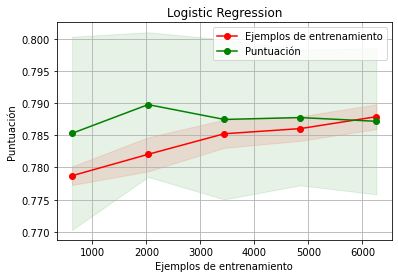

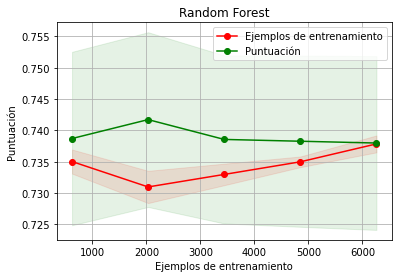

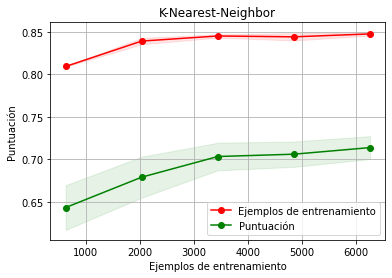

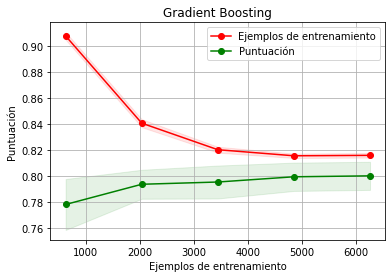

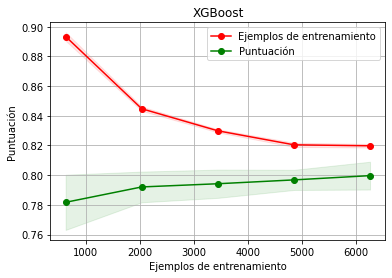

In [88]:
from sklearn.model_selection import learning_curve

learning_curve(logistic, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logistic, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_RF, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)


### Enviamos los datos a un csv

In [98]:

output = pd.DataFrame({" PassengerId": test_x["PassengerId"], "Survived": predictions})
output.to_csv("spaceshippredictions.csv", index=False)
